## Visualize on all Captain Crunch bug reports

For each bug, we plot out:
- **Forecast plot**: step forecast result and 1 month future forecast with ARMA + FFT models using open window and sliding window respectively.
- **CR/TR plot**: capacity remaning and time remaining plots as computed in VRops.

In [1]:
import json
import argparse
import os.path
import fnmatch
import re
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy import stats
from pandas import Series
import matplotlib as mpl
%matplotlib inline

In [2]:
def plot_forecast(filename):
    forecast = pd.read_csv(filename, index_col=0, squeeze=True, parse_dates=True)
    actual = forecast['actual']
    actual = actual.dropna()
    has_long = False
    has_short = False
    if "m1_long_predict" in forecast:
        has_long = True
    if "m1_short_predict" in forecast:
        has_short = True

    column_per_model = 9 if has_long and has_short else 6
    num_models = int((forecast.shape[1] - 1) / column_per_model)
    fig = plt.figure(figsize=(20,4 * (num_models+1)))
    axs = [fig.add_subplot(num_models+1,1,i+1) for i in range(num_models+1)]
    axs[0].plot(actual)
    axs[0].set_title("original time series", fontsize=16)

    for i in range(1, num_models+1):
        if has_long:
            l_predict = forecast['m{0}_long_predict'.format(i)]
            l_upper = forecast['m{0}_long_upper'.format(i)]
            l_lower = forecast['m{0}_long_lower'.format(i)]
        if has_short:
            s_predict = forecast['m{0}_short_predict'.format(i)]
            s_upper = forecast['m{0}_short_upper'.format(i)]
            s_lower = forecast['m{0}_short_lower'.format(i)]
        f_predict = forecast['m{0}_future_predict'.format(i)]
        f_upper = forecast['m{0}_future_upper'.format(i)]
        f_lower = forecast['m{0}_future_lower'.format(i)]
        

        metric_length = len(actual)
        history_days = metric_length / 288
        future_days = len(f_predict) / 288 - history_days
        model_name = "ARMA + FFT"
        sample_strategy = "OPEN WINDOW" if i == 1 else "SLIDING WINDOW"
        axs[i].plot(actual, 'b.', label='ground truth, metric_length={0}={1:.1f} days'.format(metric_length, history_days), linewidth=2)
        if has_long:
            axs[i].plot(l_predict, 'r', linewidth=2,
                label='long-term forecast')
            axs[i].fill_between(forecast.index,
                            l_upper,
                            l_lower, color='r', alpha=.2)
        if has_short:
            axs[i].plot(s_predict, 'g', linewidth=2,
                label='short-term forecast')
            axs[i].fill_between(forecast.index,
                            s_upper,
                            s_lower, color='g', alpha=.2)

        axs[i].plot(f_predict, 'm', linewidth=2,
            label='future forecast for {:.0f} days'.format(future_days))
        axs[i].fill_between(forecast.index,
                        f_upper,
                        f_lower, color='m', alpha=.2)
        axs[i].legend(loc='lower right', fontsize=14)
        axs[i].set_title("Models={0}, Sample={1}".format(model_name, sample_strategy), fontsize=16)

    outputPath = os.path.splitext(filename)[0] + ".png"
    fig.tight_layout()
    plt.show()

In [3]:
def plot_capacity_planning(filename):
    table = pd.read_csv(filename, index_col=0, squeeze=True, parse_dates=True)
    length = table.shape[0]
    fig = plt.figure(figsize=(15,12))
    num_fig = 5
    
    ax1 = fig.add_subplot(num_fig,1,1)
    ax1.plot(table["Metric"])
    ax1.plot(table['Capacity'])
    ax1.set_title("Demand/Capacity", fontsize=20)
    ax1.tick_params(labelsize=16)

    ax2 = fig.add_subplot(num_fig,1,2)
    ax2.plot(table["TR"])
    ax2.set_title("Time Remaining(Days)", fontsize=20)
    ax2.plot(Series(data=np.zeros(length), index=table.index), 'r--')
    ax2.tick_params(labelsize=16)

    ax3 = fig.add_subplot(num_fig,1,3)
    ax3.plot(table["CR"])
    ax3.plot(table['Capacity'])
    ax3.set_title("Capacity Remaining", fontsize=20)
    ax3.tick_params(labelsize=16)

    ax4 = fig.add_subplot(num_fig,1,4)
    ax4.plot(table["beta"][100:])
    ax4.plot(Series(data=np.zeros(length), index=table.index), 'r--')
    ax4.set_title("Beta", fontsize=20)
    ax4.tick_params(labelsize=16)
    if 'r2' in table.columns:
        ax5 = fig.add_subplot(num_fig,1,5)
        ax5.plot(table["r2"])
        ax5.plot(Series(data=np.ones(length) * 0.8, index=table.index), 'r--')
        ax5.set_title("r2", fontsize=20)
        ax5.tick_params(labelsize=16)
    
    #ax5 = fig.add_subplot(num_fig,1,5)
    #ax5.plot(table["beta_std"][100:])
    #ax5.plot(Series(data=np.zeros(length), index=table.index)
    , 'r--')
    #ax5.set_title("Beta_std", fontsize=20)
    #ax5.tick_params(labelsize=16)

    fig.tight_layout()
    plt.show()
    #plt.savefig("data/TRBugs/report/bug_{}_crtr.png".format(bug))

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 1 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1945221


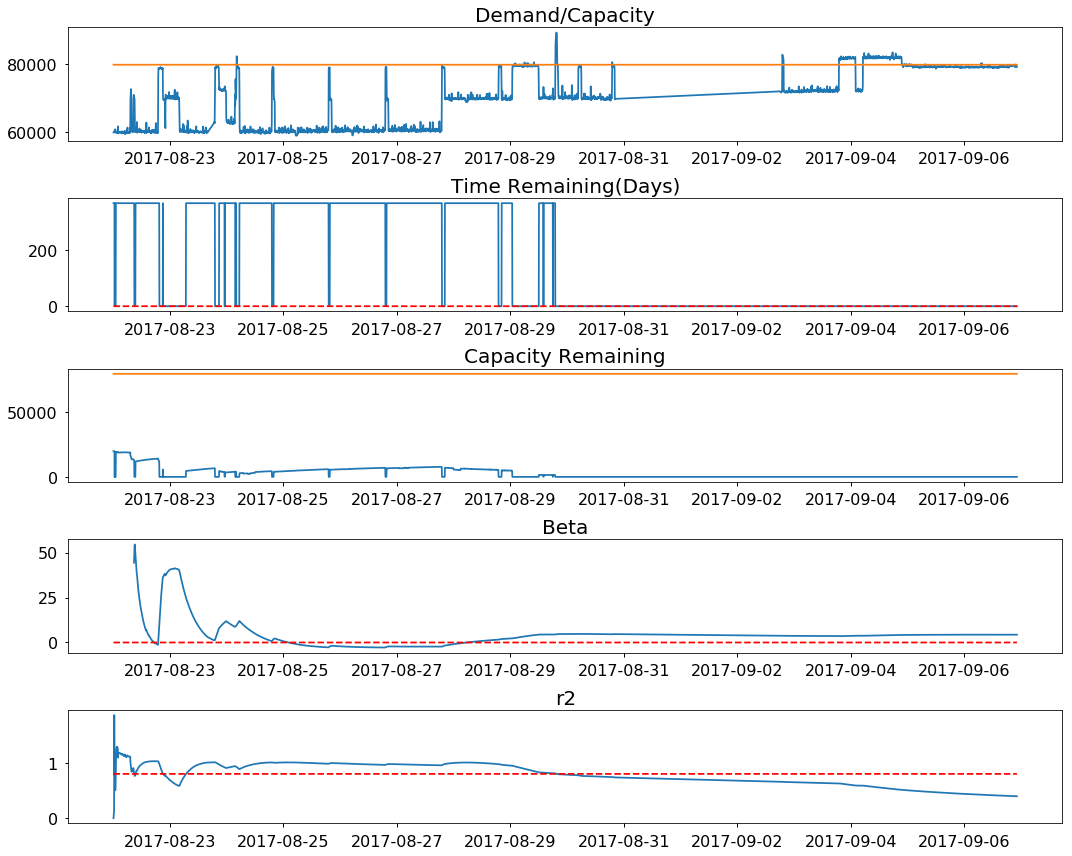

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 2 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1950721


---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 3 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1951911


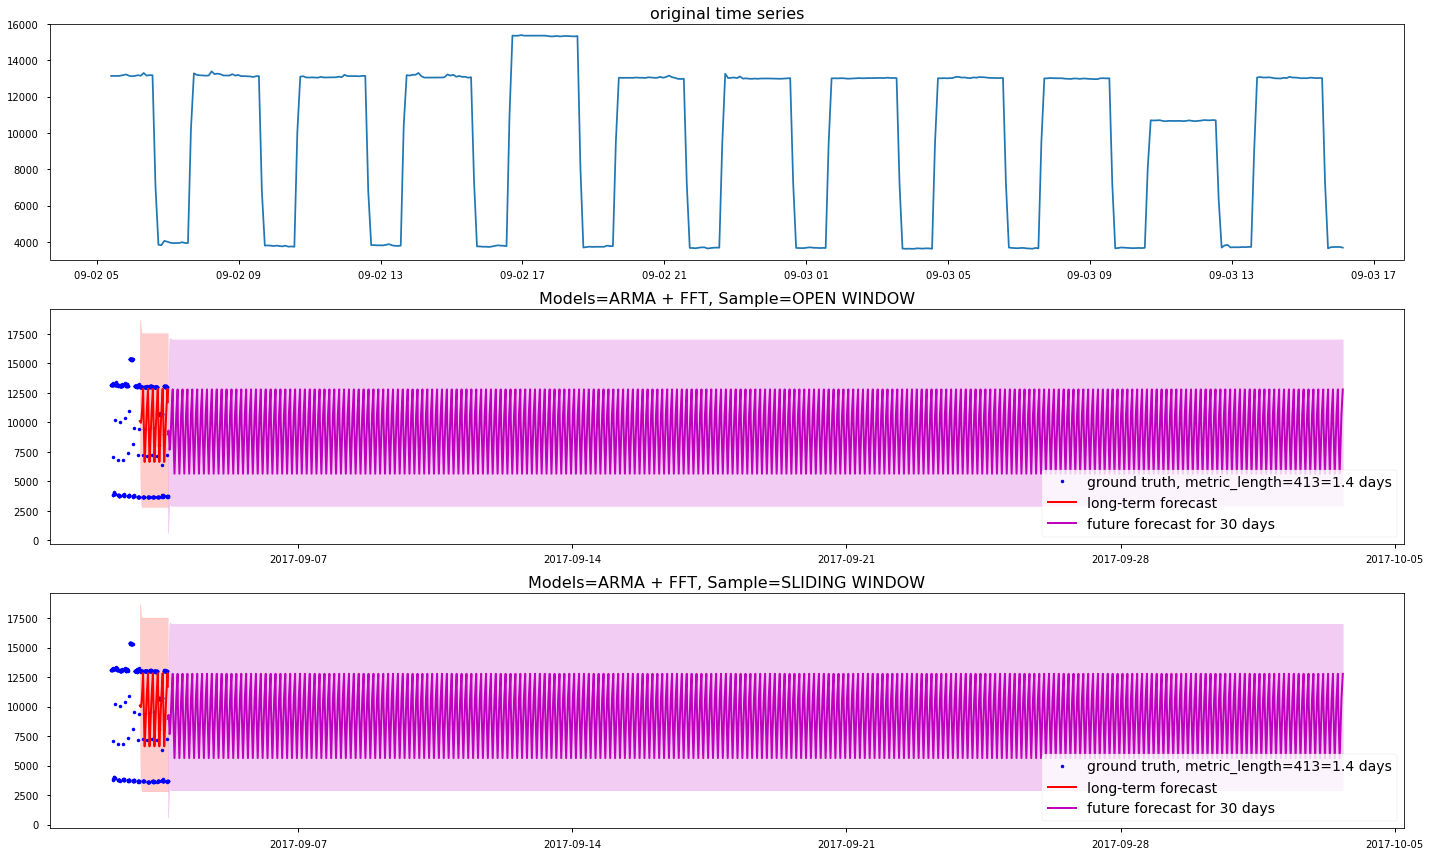

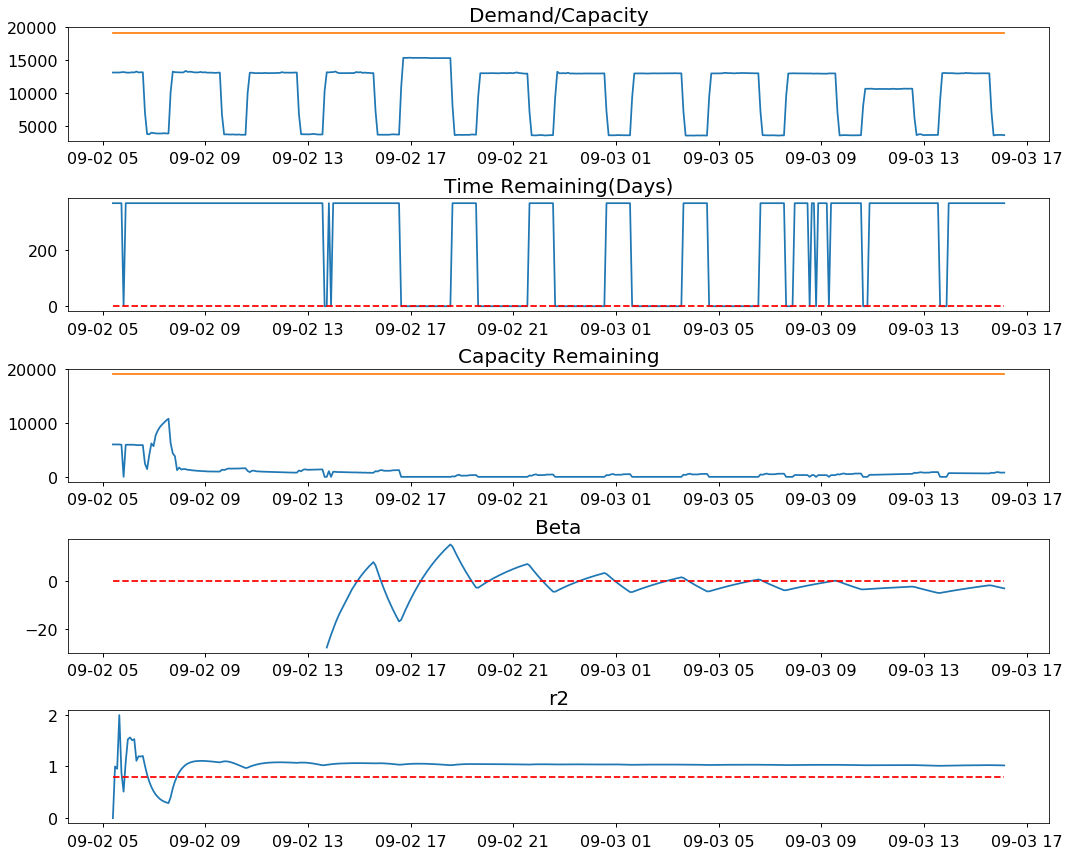

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 4 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1953300


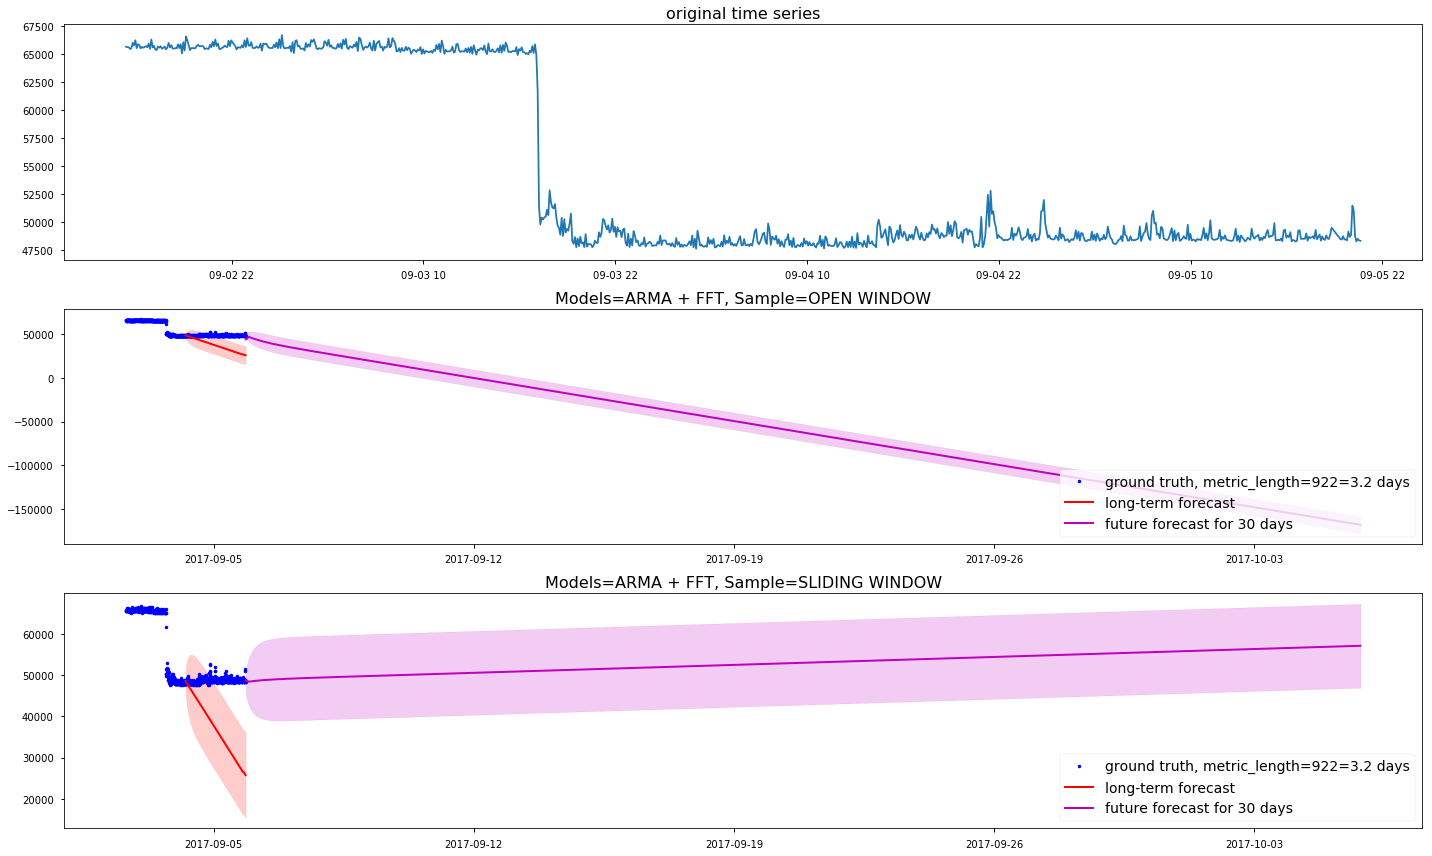

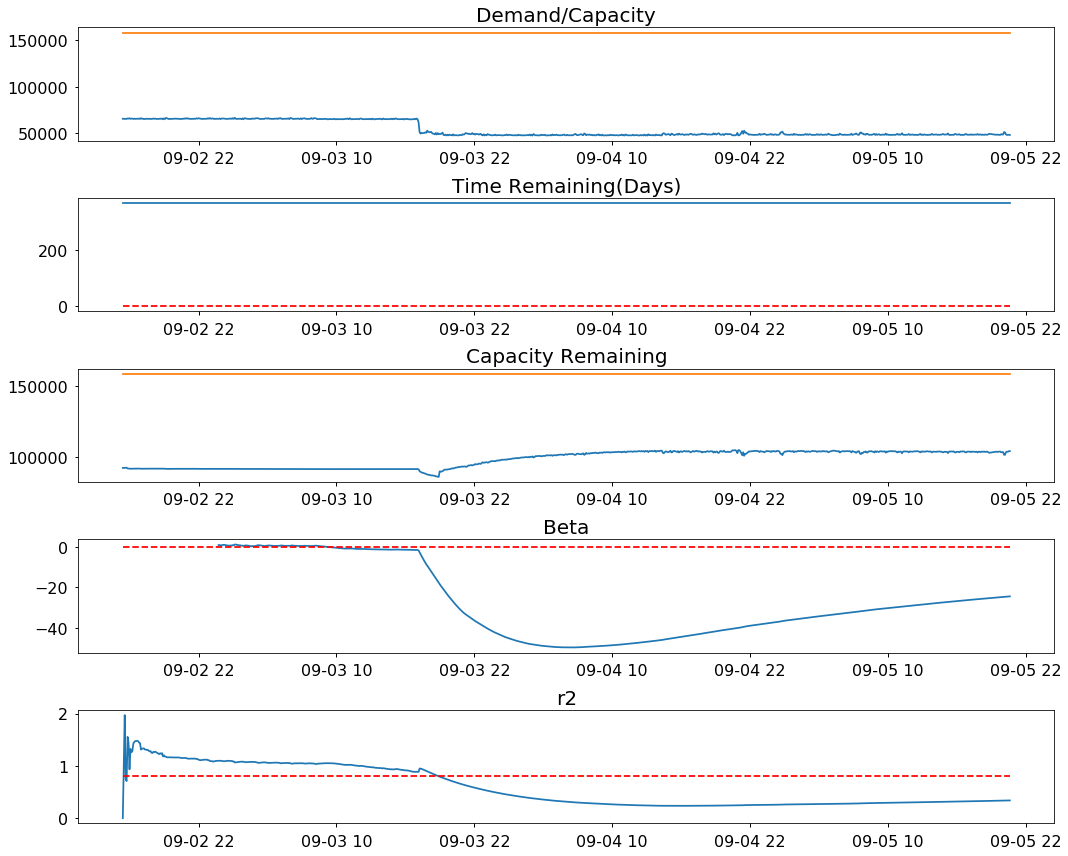

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 5 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1954261


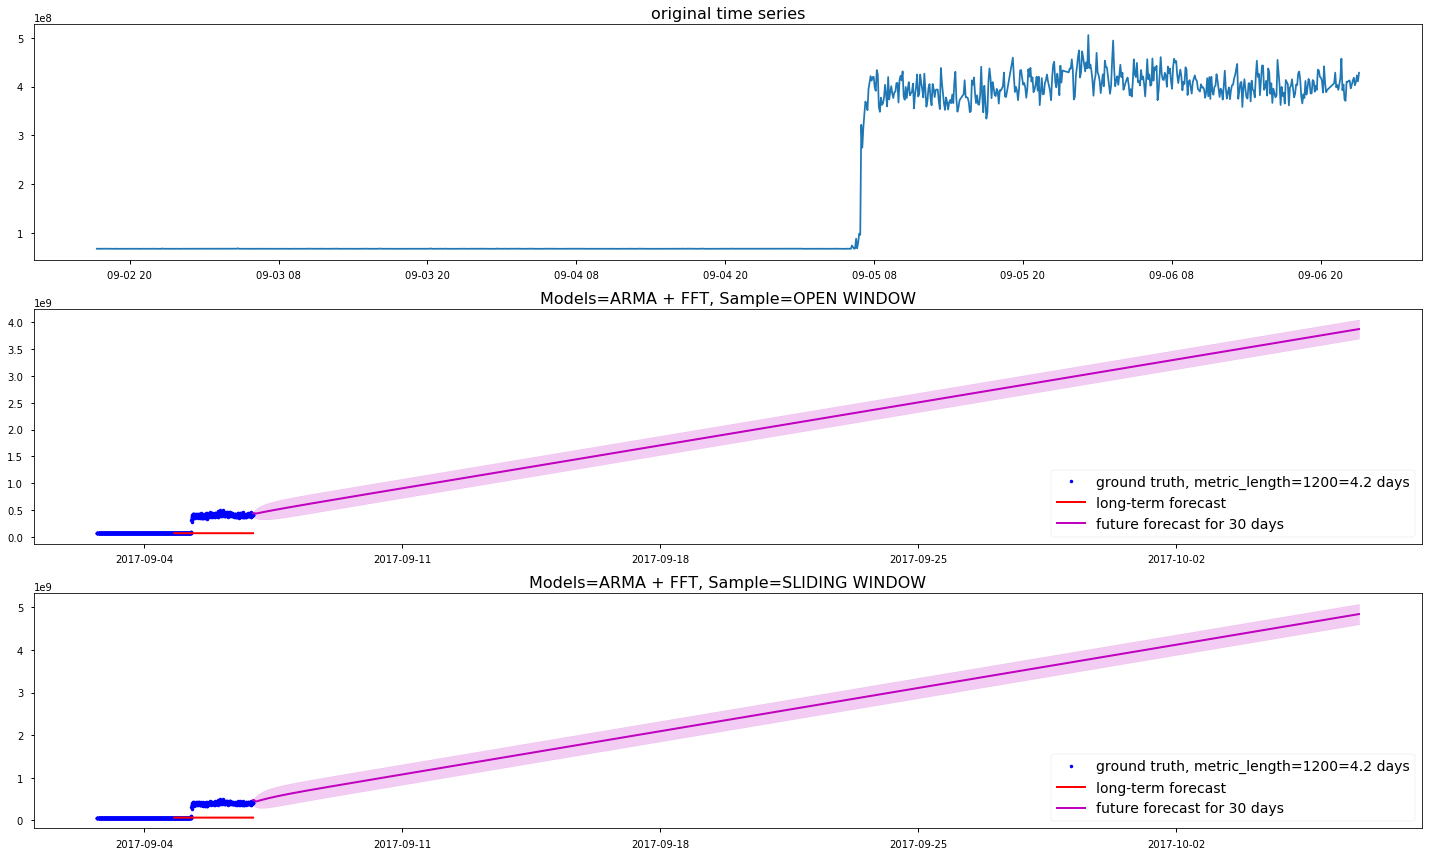

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 6 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1954982


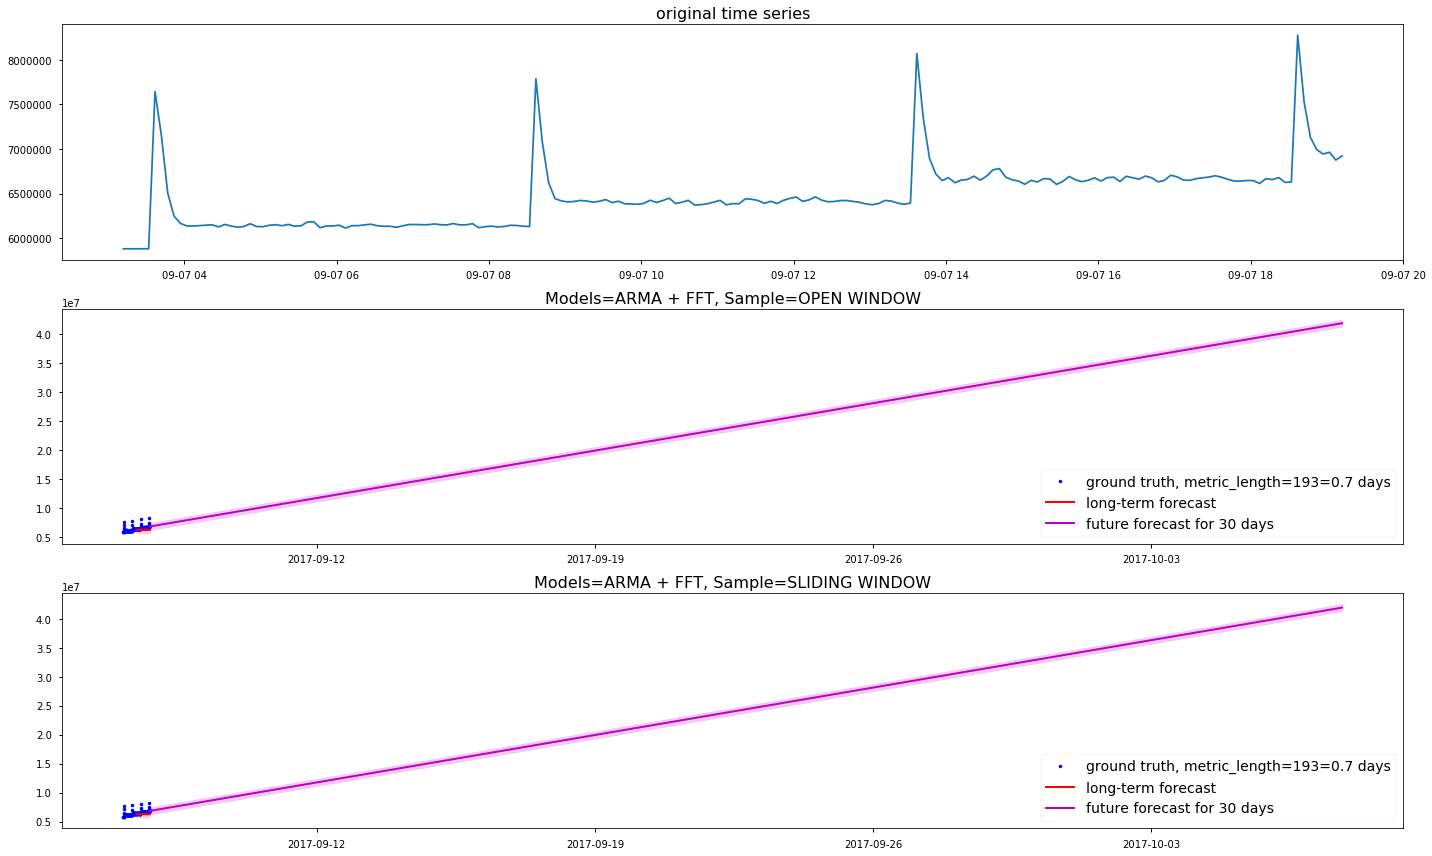

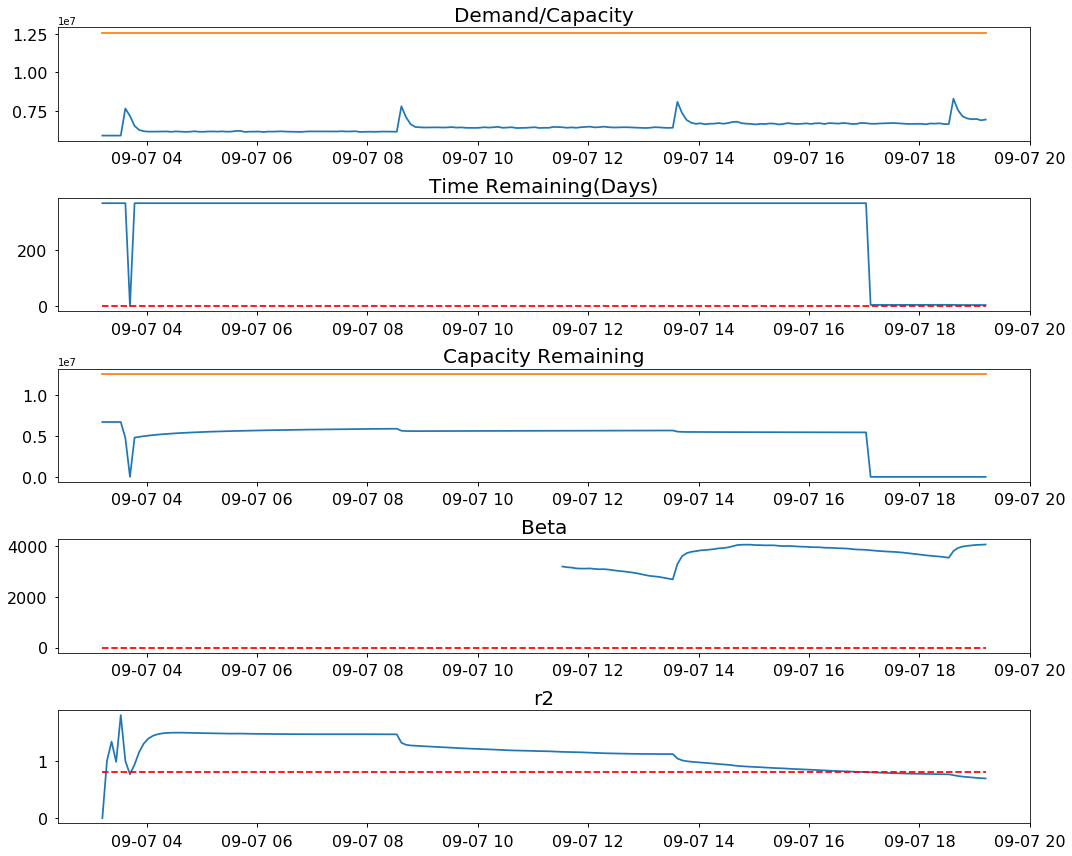

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 7 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1955035


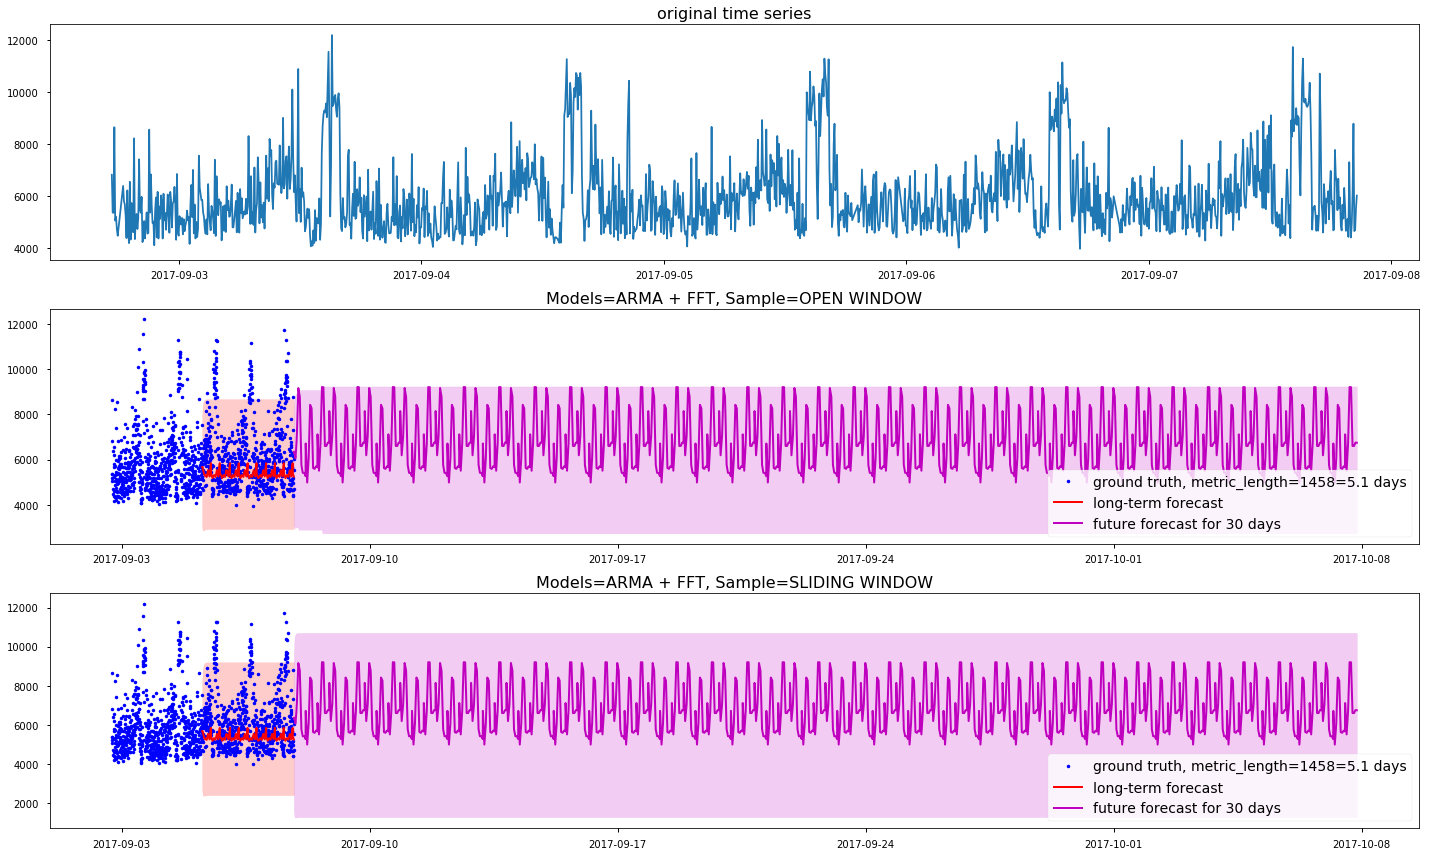

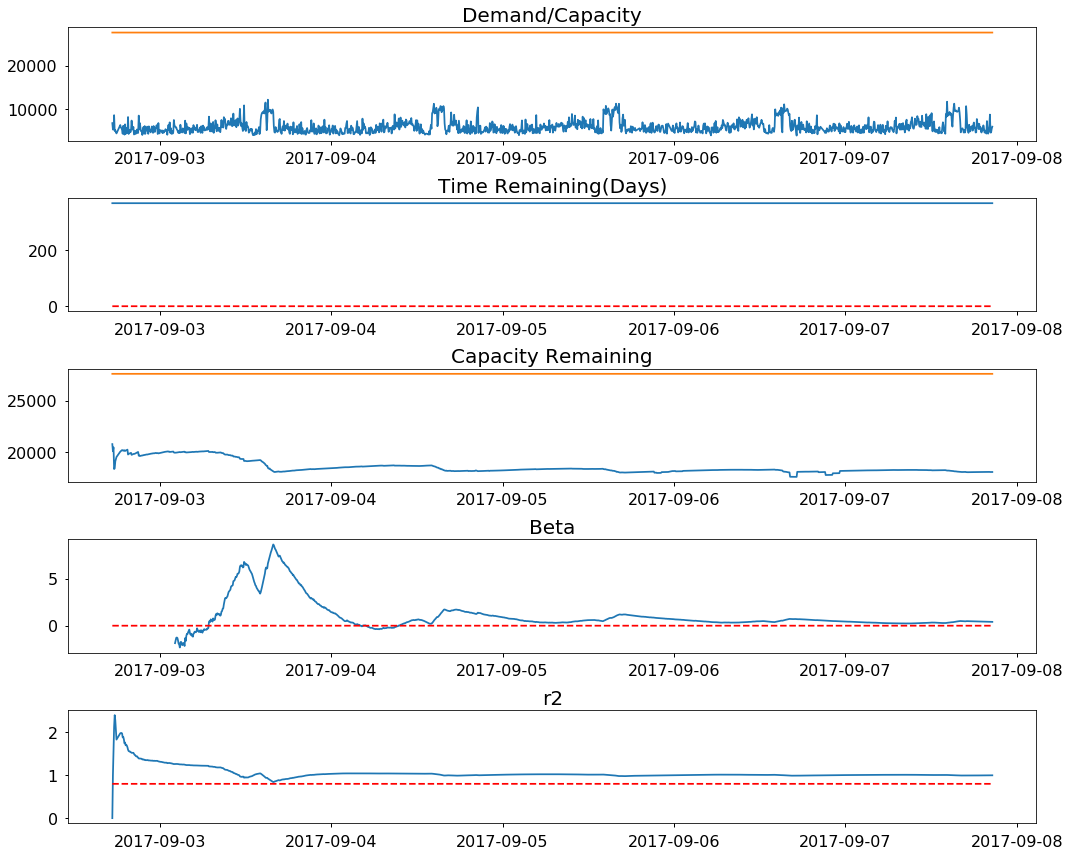

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 8 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1957236


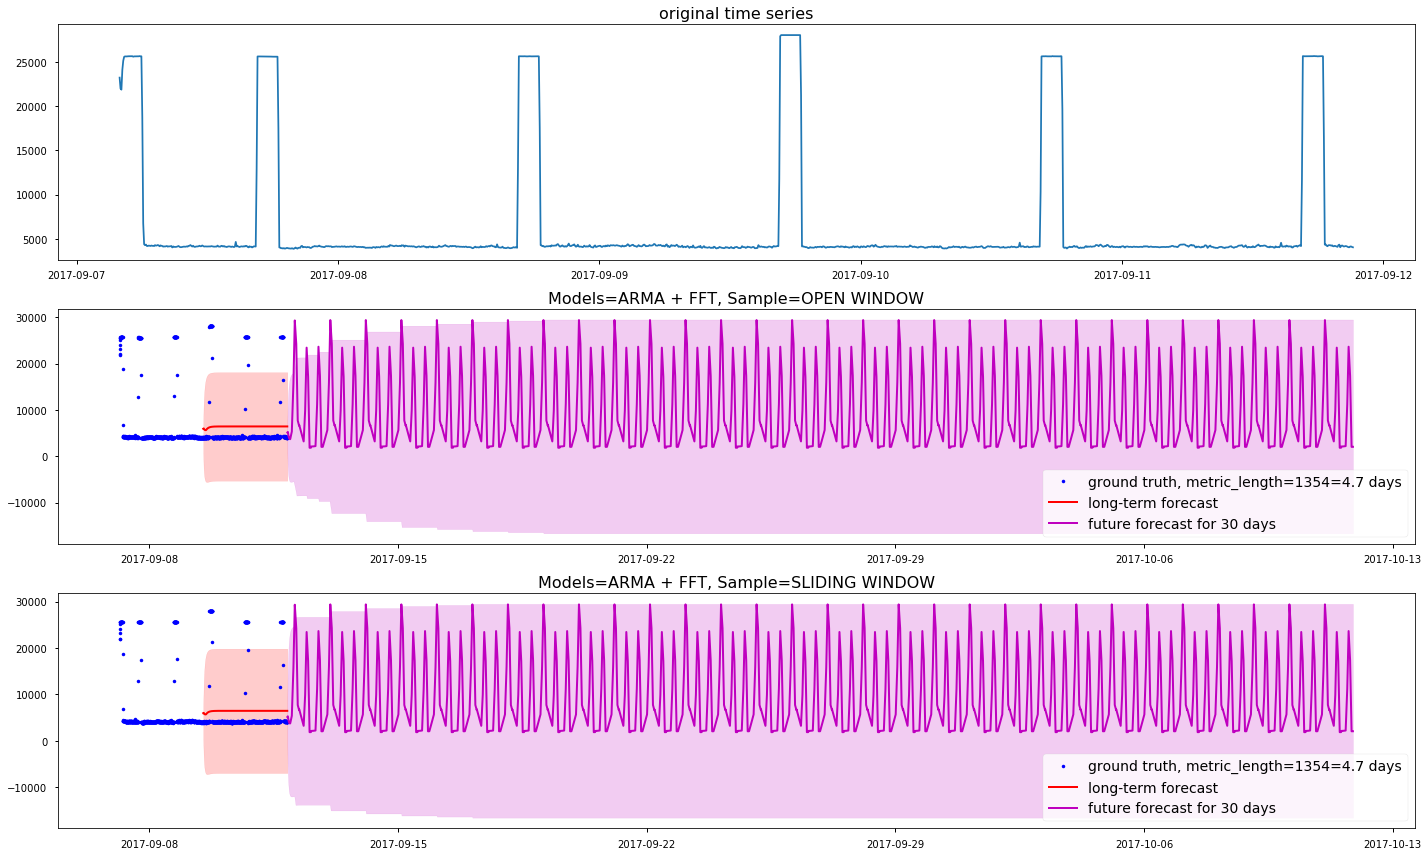

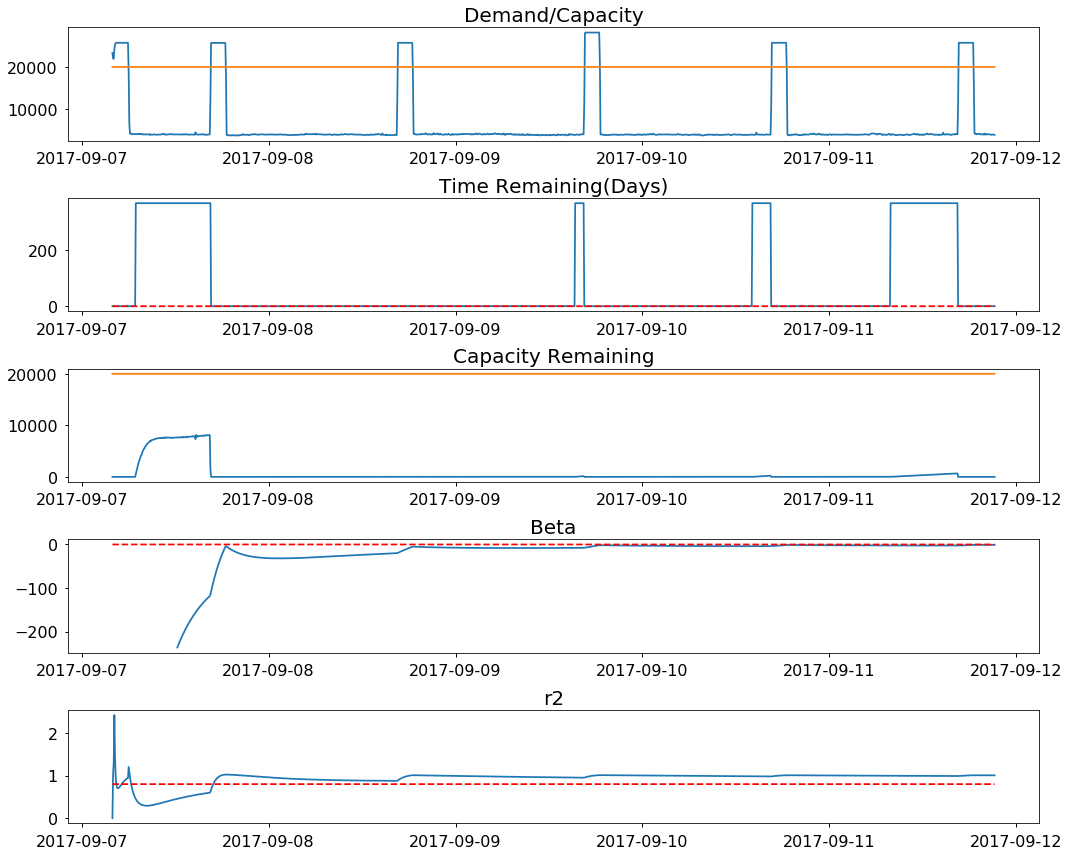

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 9 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1962140


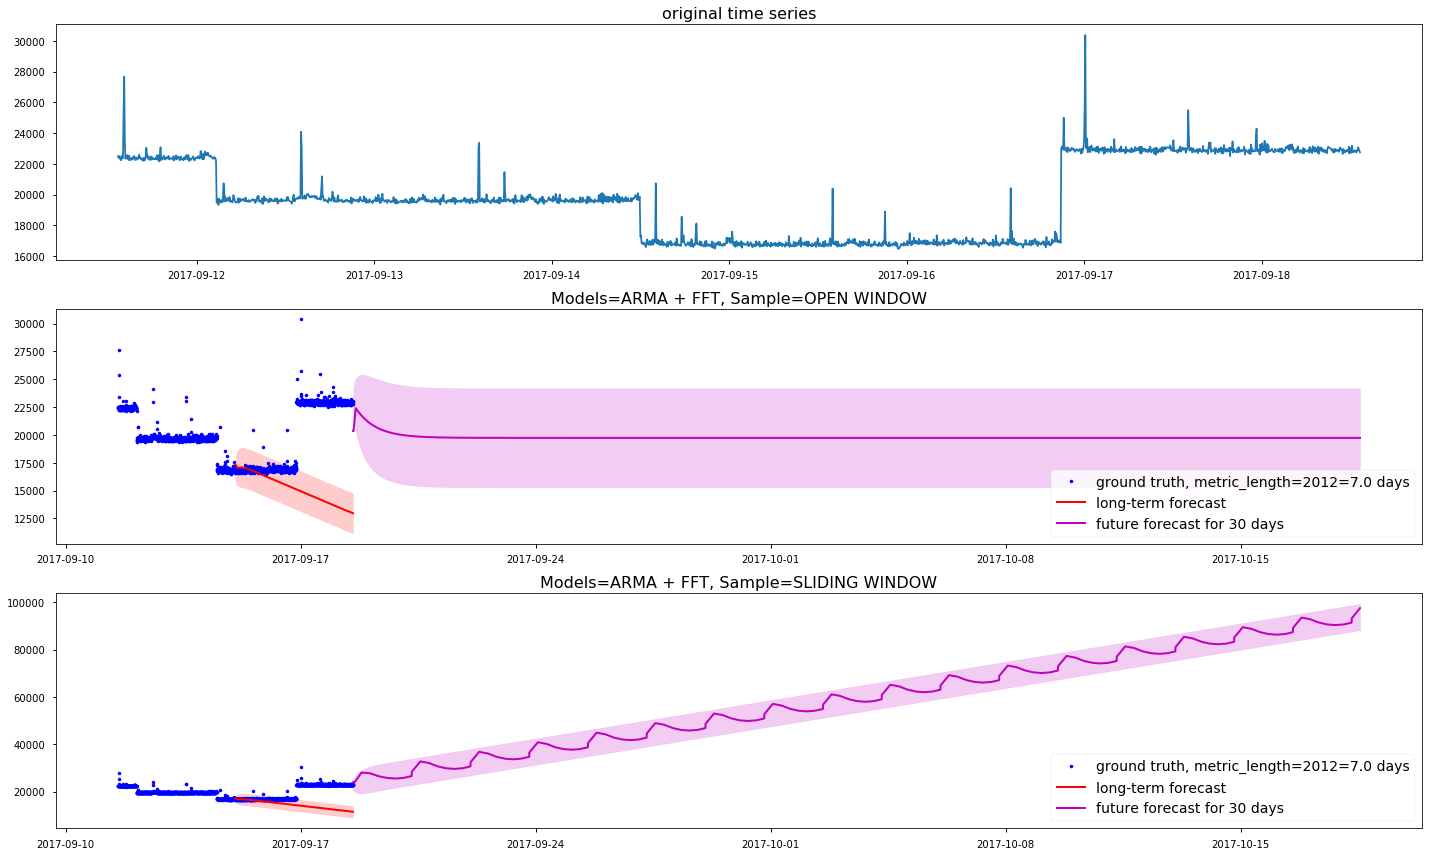

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 10 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1962186


---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 11 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1962233


---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 12 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963061


---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 13 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963086


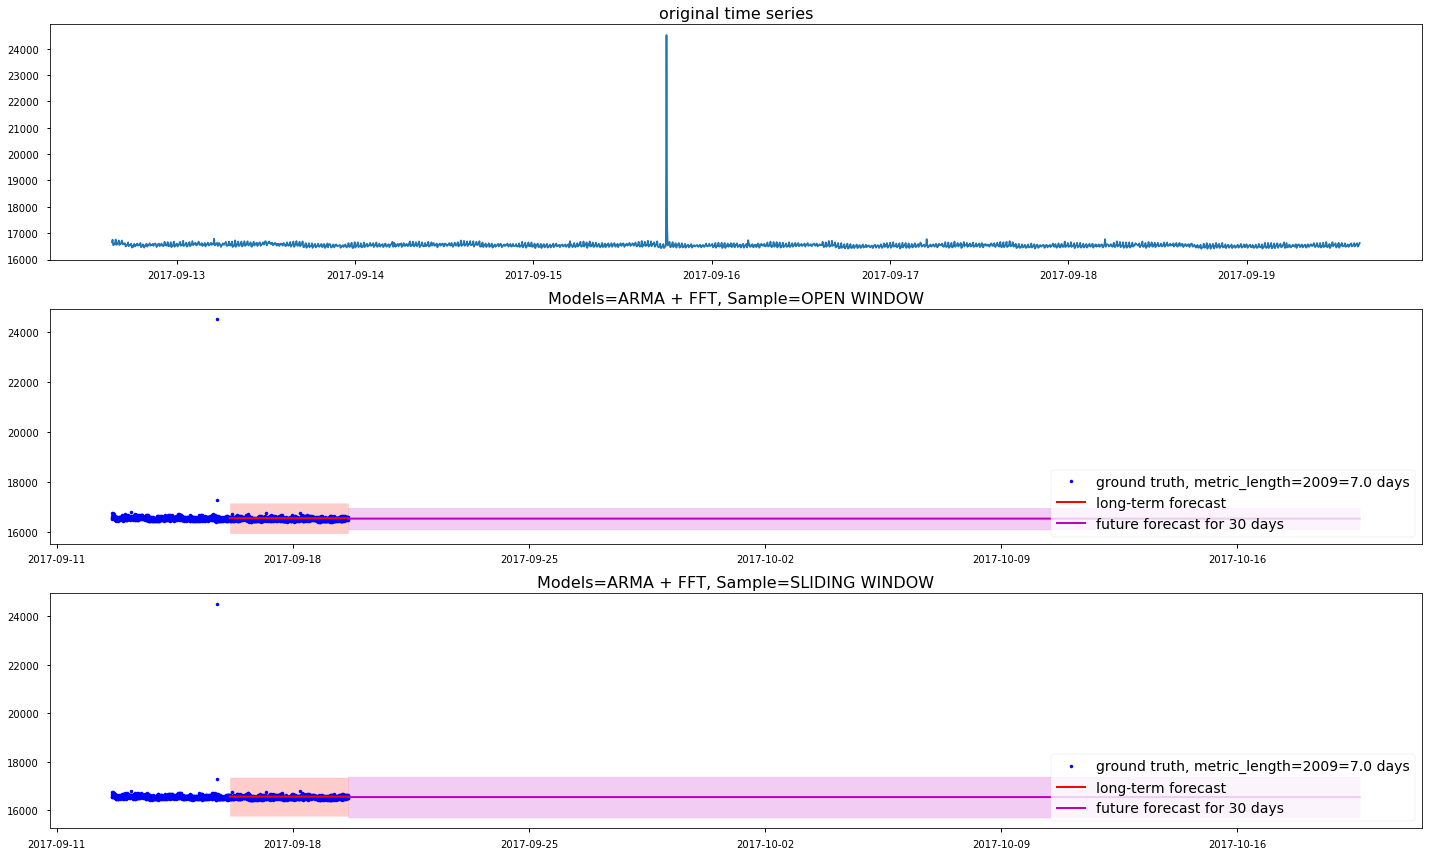

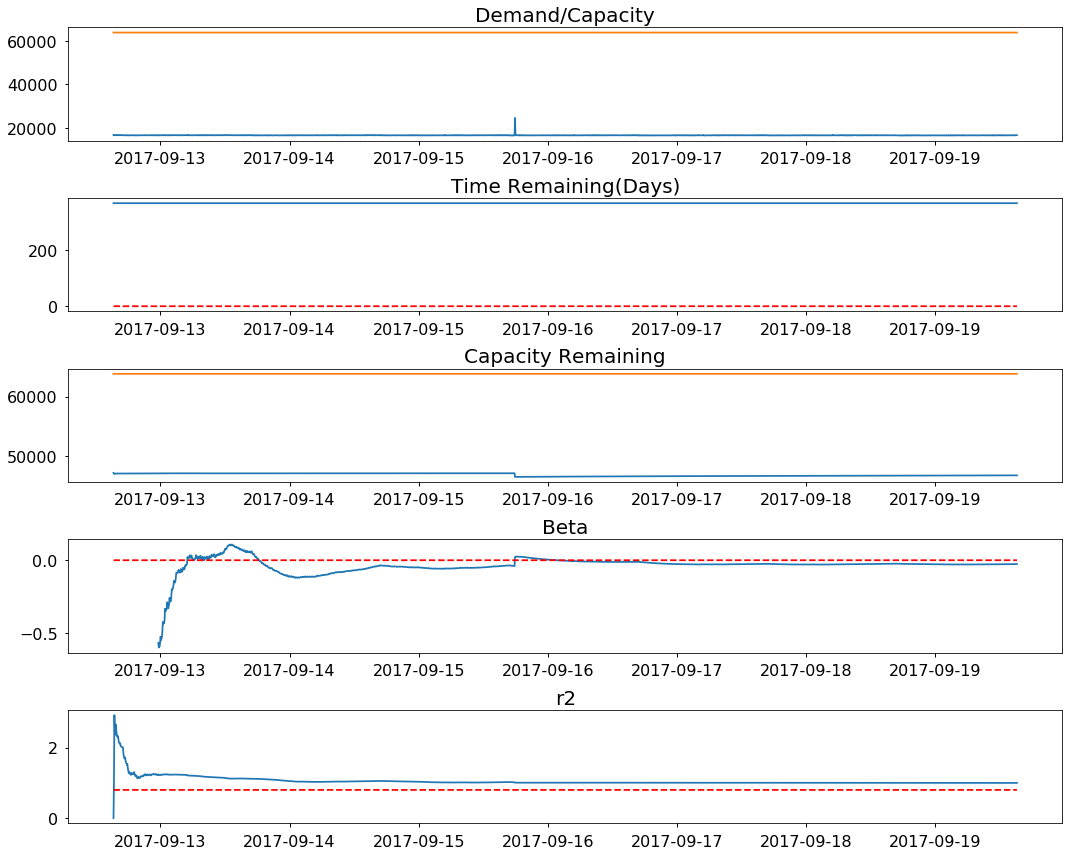

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 14 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963167


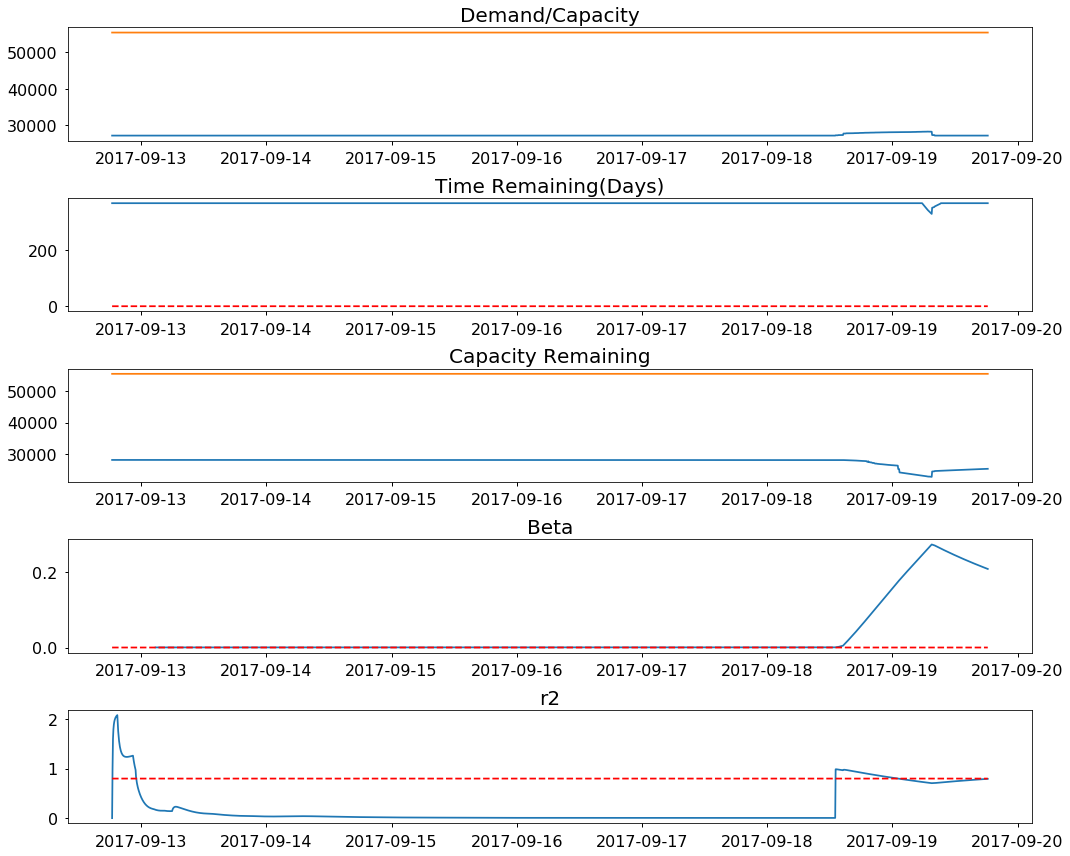

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 15 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963182


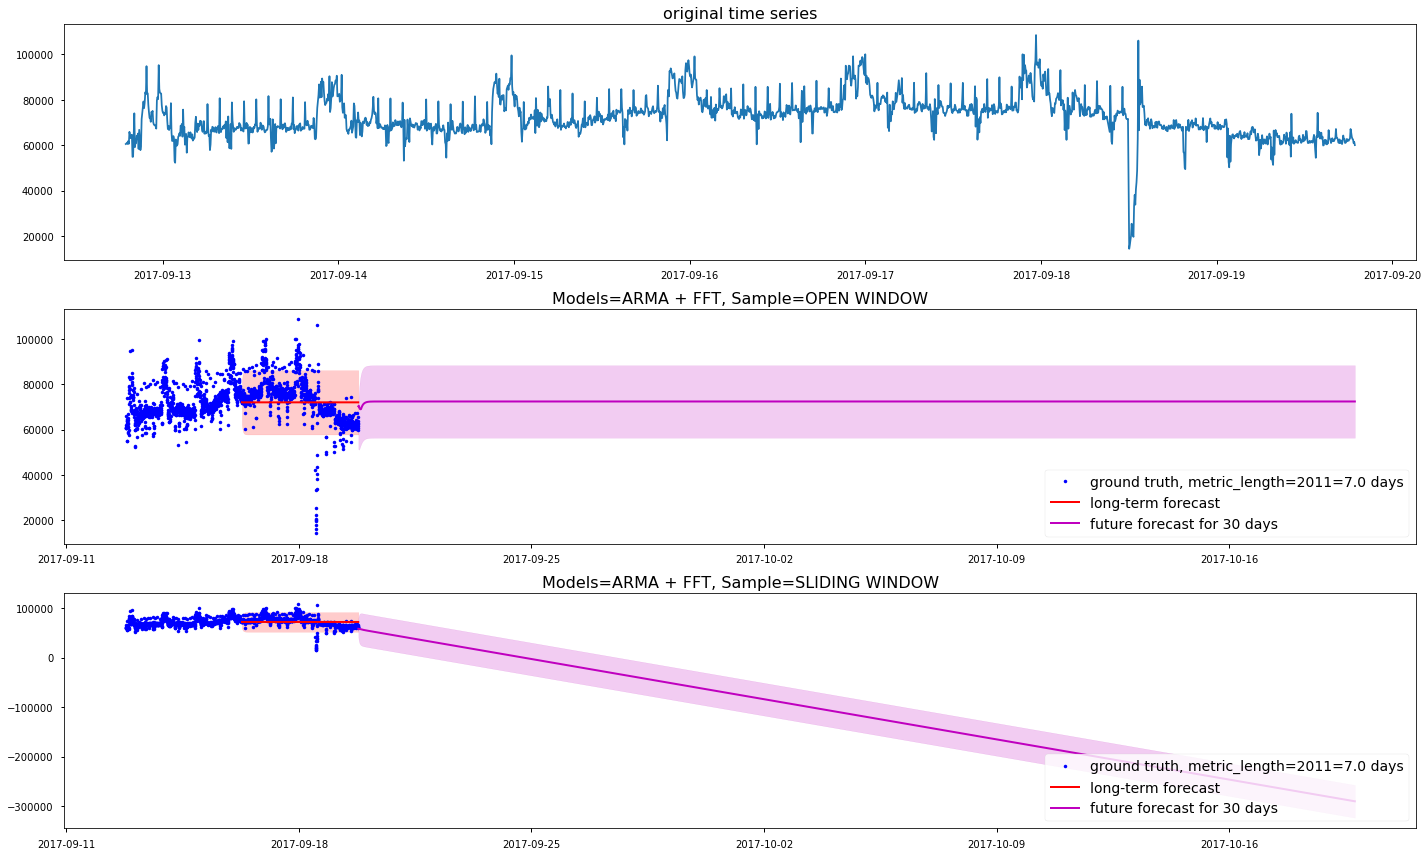

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 16 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963848


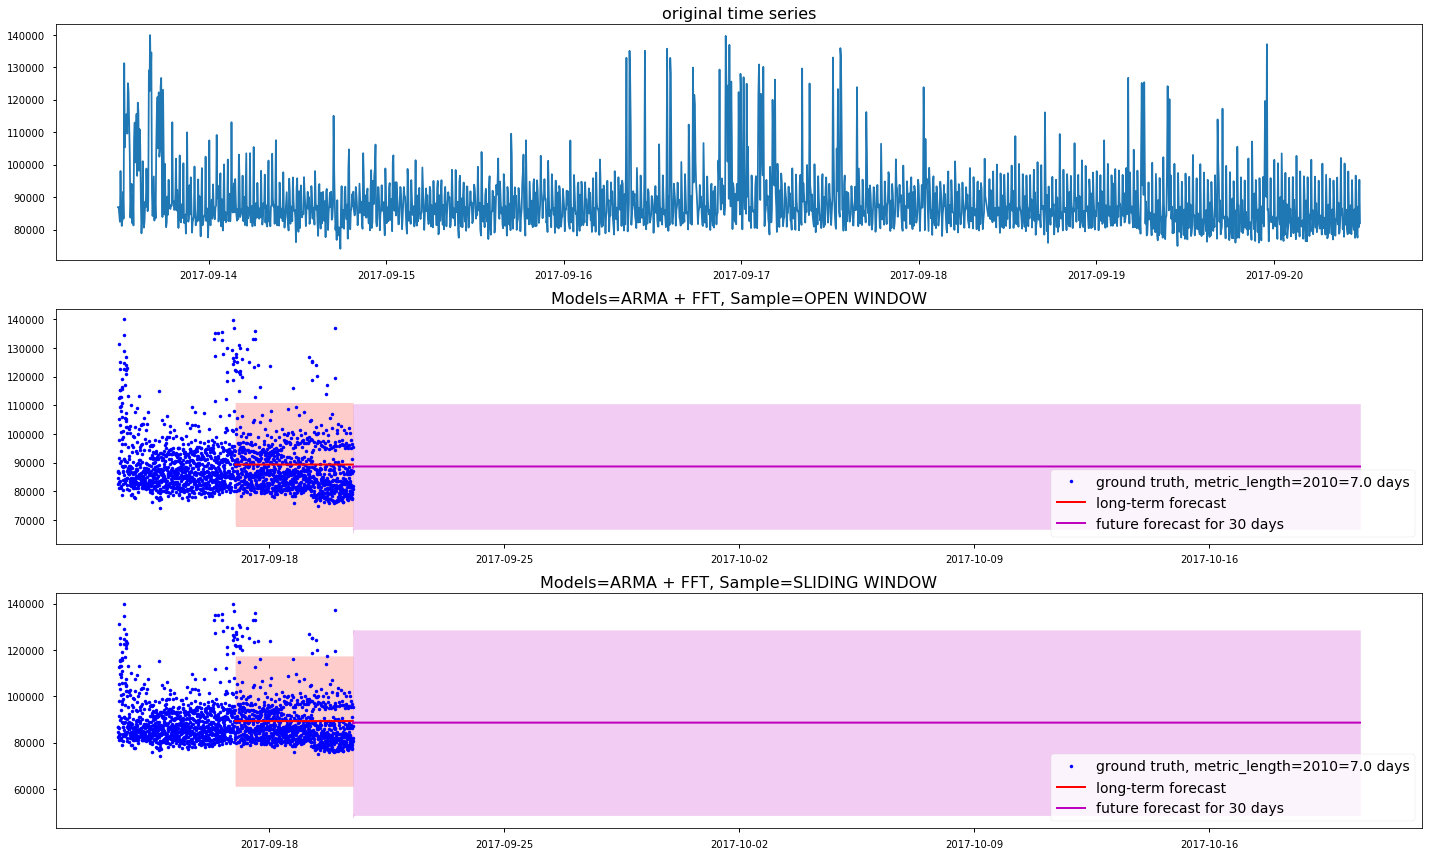

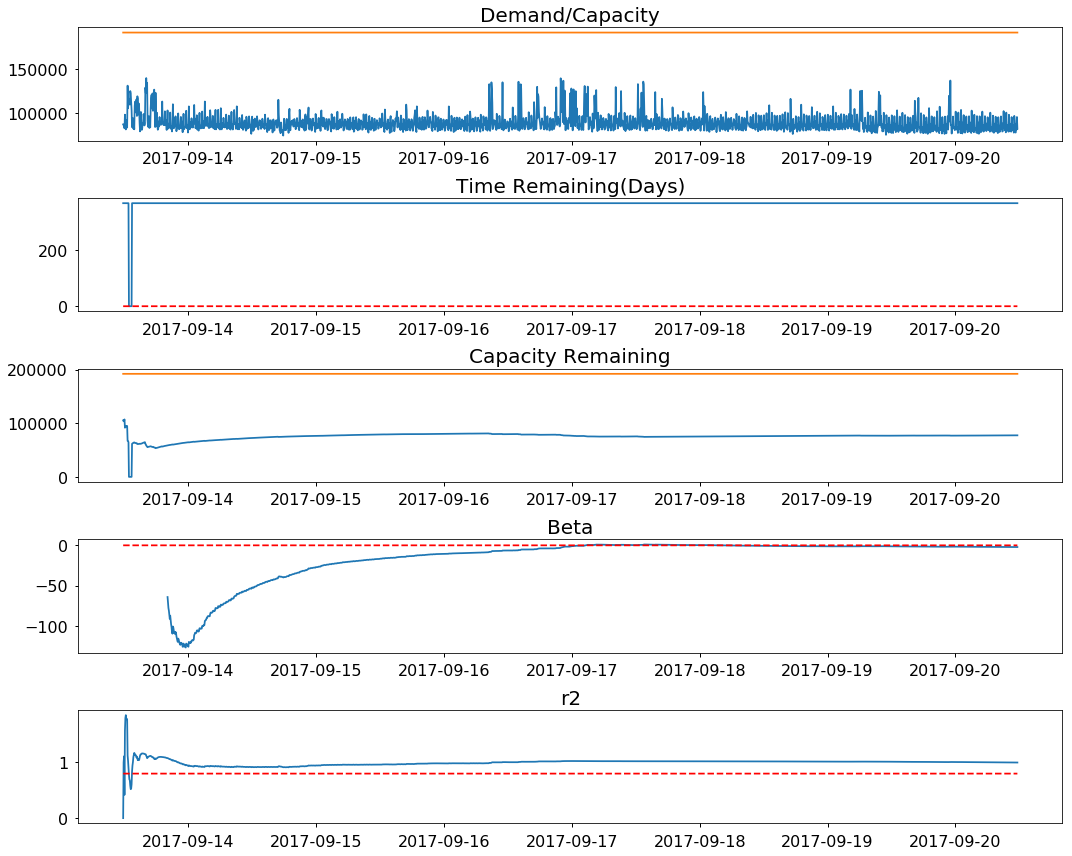

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 17 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963860


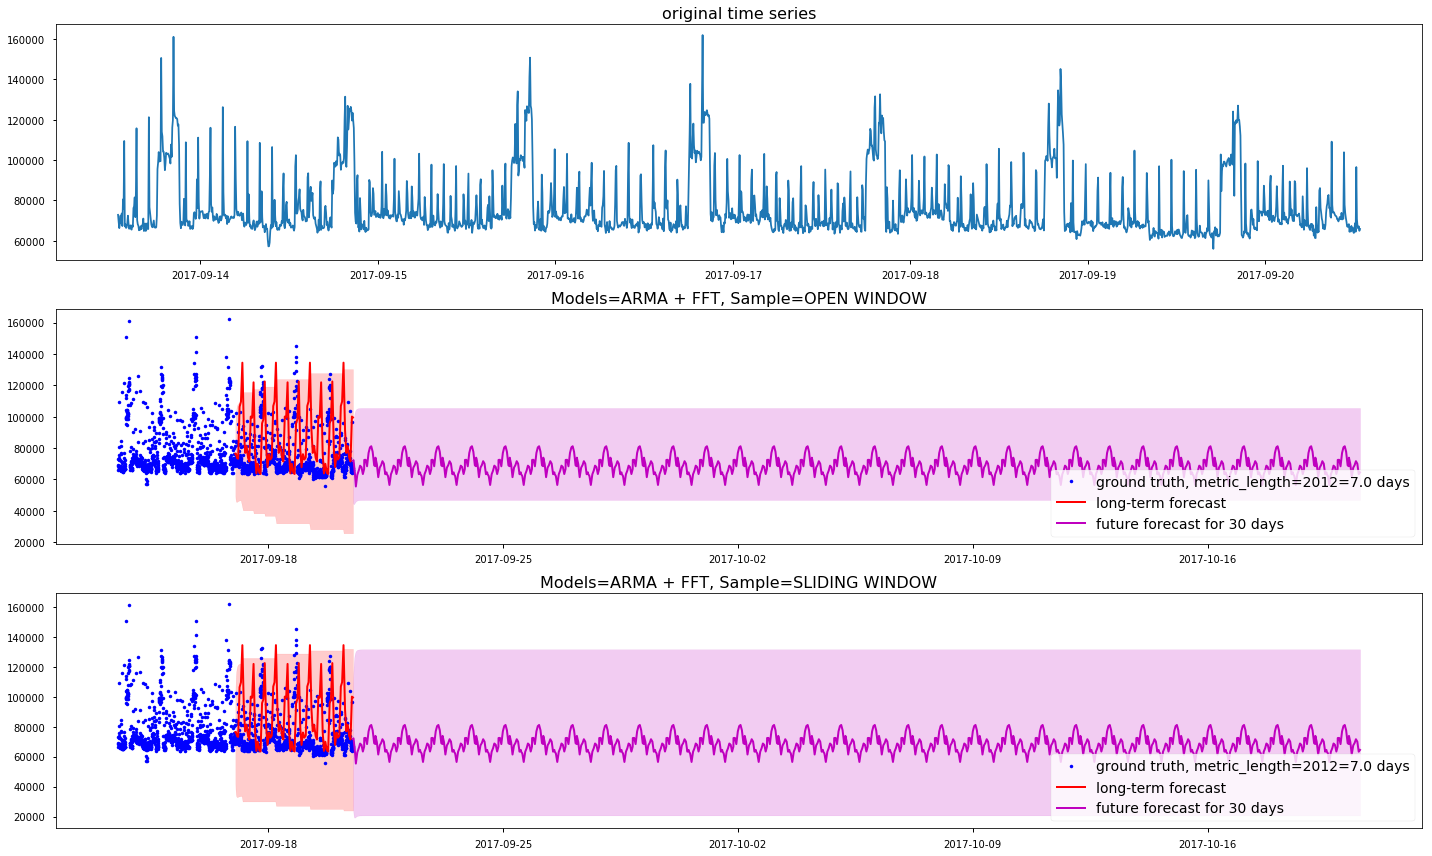

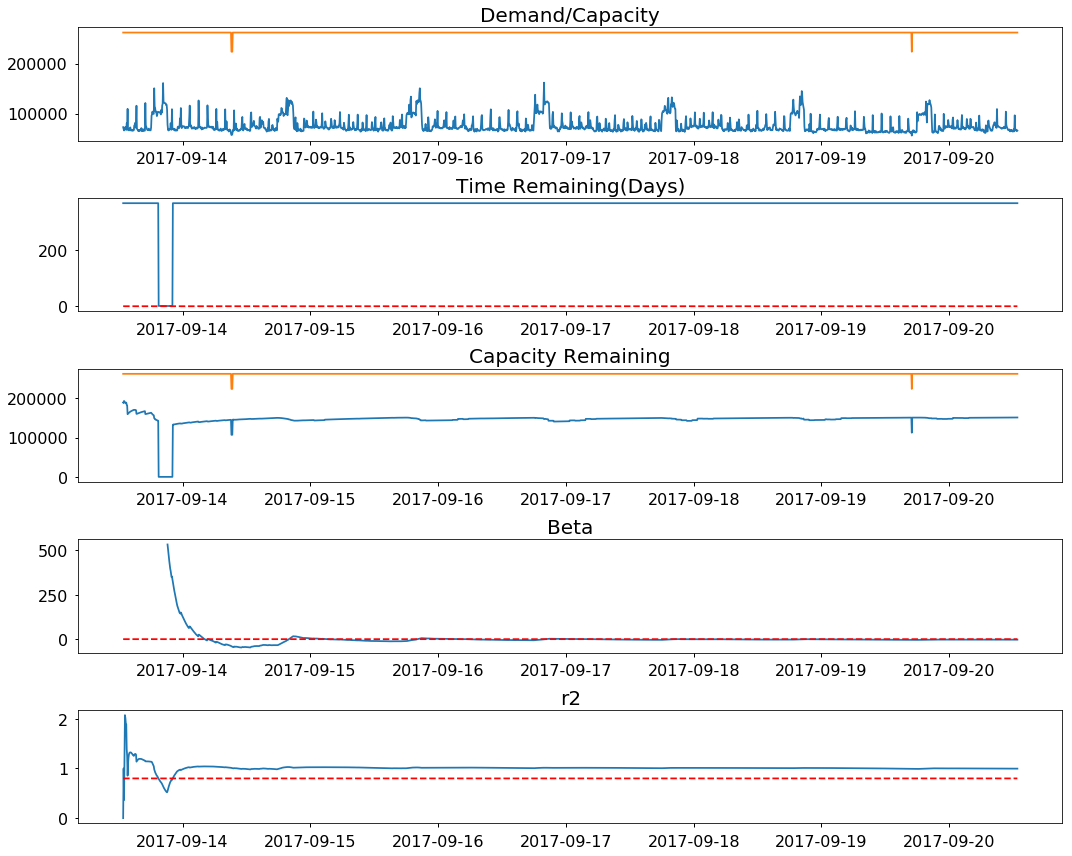

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------- 18 ---------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963944


In [4]:
# plot out all forecast and capacity planning results
plt.style.use('seaborn-notebook')
mpl.rcParams['figure.max_open_warning'] = 100

directory = "TRBugs"
demand_file_list = fnmatch.filter(listdir(directory) , "*_demand.csv")
bugIds = [re.match("bug_(\d+)_demand.csv", file).group(1) for file in demand_file_list]
n = 1
for bugId in bugIds:
    forecast_csv = "TRBugs/forecast/bug_{}_demand_forecast.csv".format(bugId)
    cr_tr_csv = "TRBugs/capacity/bug_{}_capacity.csv".format(bugId)
    forecast_old_csv = "TRBugs/forecast_old/bug_{}_demand_forecast.csv".format(bugId)
    cr_tr_old_csv = "TRBugs/capacity_old/bug_{}_capacity.csv".format(bugId)
    print("---------------------------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------- {} ---------------------------------------------------------------".format(n))
    print("---------------------------------------------------------------------------------------------------------------------")
    print("https://bugzilla.eng.vmware.com/show_bug.cgi?id={}".format(bugId))
    #plot_forecast(forecast_old_csv)
    #plot_capacity_planning(cr_tr_old_csv)
    #print("------------------------------------------------ New results ------------------------------------------------")
    plot_forecast(forecast_csv)
    plot_capacity_planning(cr_tr_csv)
    n += 1

## Long term stability analysis
All the above test cases are testing a very limited situation: the length of input metrics are only a few days, but TR/CR is trying to forecast one year in the future.

To test on a much longer input metric, to see how the TR/CR results stabilize over time if the input metric is long enough, I took two 7 day metric from the bug reports and repeats their patterns 26 times to generate 6 month metric.

### Results:

The first example took about 2 month to have a stable TR output.

The second example took about 1 month to stable.

For the third example, over the long term, periodicity don’t really effect TR values, (beta is zero), but CR dips at peaks workload, which I think will be fixed with the in-place FFT?

Note that it does take a while to stabilize, (we will improve that). But once it stablizes, random spiky noise will hardly affect the trend.

In [12]:
bugIds = [1962233, 1963944, 1963860]
long_ts_list = []

for bugId in bugIds:
    forecast_csv = "TRBugs/forecast/bug_{}_demand_forecast.csv".format(bugId)
    table = pd.read_csv(forecast_csv, index_col=0, squeeze=True, parse_dates=True)
    ts = table['actual'].dropna()
    value = ts.values
    long_value = np.repeat(value, 26)        # repeat each value
    #long_value = np.tile(value, (1,26))[0]  # repeat whole series
    long_datetime = pd.date_range("09/14/2017", freq="5T", periods=len(long_value))
    long_ts = Series(long_value, index=long_datetime)
    #long_ts.to_csv("TRBugs/long_demand.csv")
    long_ts_list.append(long_ts)


FileNotFoundError: File b'TRBugs/long/long_cr_tr_results_1.csv' does not exist

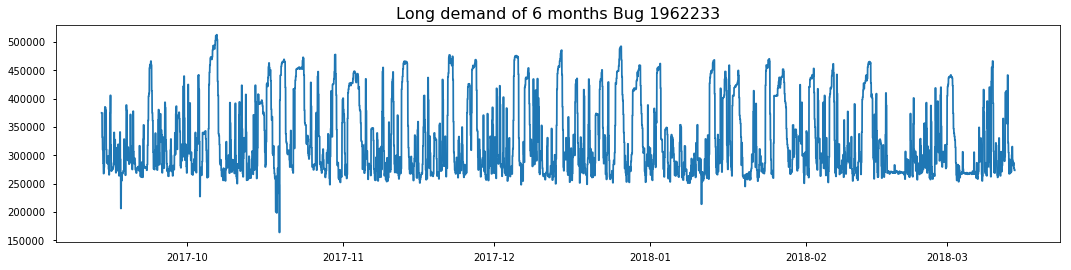

In [13]:
fig = plt.figure(figsize=(18,4))
plt.plot(long_ts_list[0])
plt.title("Long demand of 6 months Bug 1962233", fontsize=16)
plot_capacity_planning("TRBugs/long/long_cr_tr_results_1.csv")

fig = plt.figure(figsize=(18,4))
plt.plot(long_ts_list[1])
plt.title("Long demand of 6 months Bug 1963944", fontsize=16)
plot_capacity_planning("TRBugs/long/long_cr_tr_results_2.csv")

fig = plt.figure(figsize=(18,4))
plt.plot(long_ts_list[2])
plt.title("Long demand of 6 months Bug 1963944", fontsize=16)
plot_capacity_planning("TRBugs/long/long_cr_tr_results_3.csv")